# The Advanced Pendulum Problem

The pendulum problem can involve analyzing various aspects of the motion, such as calculating the period, understanding how the period depends on the length of the pendulum, investigating the effect of amplitude on the motion, and exploring the energy transformations during the oscillation.

It's a classic problem in physics and is often used to illustrate concepts related to oscillatory motion, energy conservation, and the mathematical modeling of physical systems. The simplicity of the system makes it a valuable introductory example for studying periodic motion and the principles of physics.

This notebook explores the pendulum problem from a Computational and Applied Mathematics standpoint.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

Consider the advanced pendulum problem that consists of mass $m$ attached to one end of a wire of length $L$
of negligible mass. The other end of the wire is attached to a joint at position $P$. The pendulum moves only within the plane. The angle formed by the wire and the vertical is $θ(t)$. The angle has a positive value when the wire is to the right of the vertical. The position of the particle is:

$$
x(t) = P + L(sin(θ(t)), − cos(θ(t)))
$$

The gravity constant is denoted by $g>0$. The euqation for the angle $θ$ is:

$$
\frac{d^2θ}{dt^2} + b \frac{dθ}{dt} + \frac{g}{L} \sin(θ(t)) = 0
$$

with initial conditions:

$$
θ(0)=θ_0 , \frac{dθ}{dt} (0) = \zeta_0
$$

We assume that $b>0$ (note that if $b=0$, we reover the simple pendulum problem introduced in the class). The choice $b>0$ adds viscous function; the frictional force is proportional to the angular speed at the joint of the pendulum.

As in the class we transform the second order ODE into a system of two first-order ODEs:

$$
\textbf{y}' = \textbf{f}(\textbf{y})
$$

where $\textbf{y} = (y_1, y_2)$ and

$$
y_1 = θ, y_2 = \frac{dθ}{dt}.
$$

$\textbf{(1)}$ Determine the expression of $\textbf{f}$.

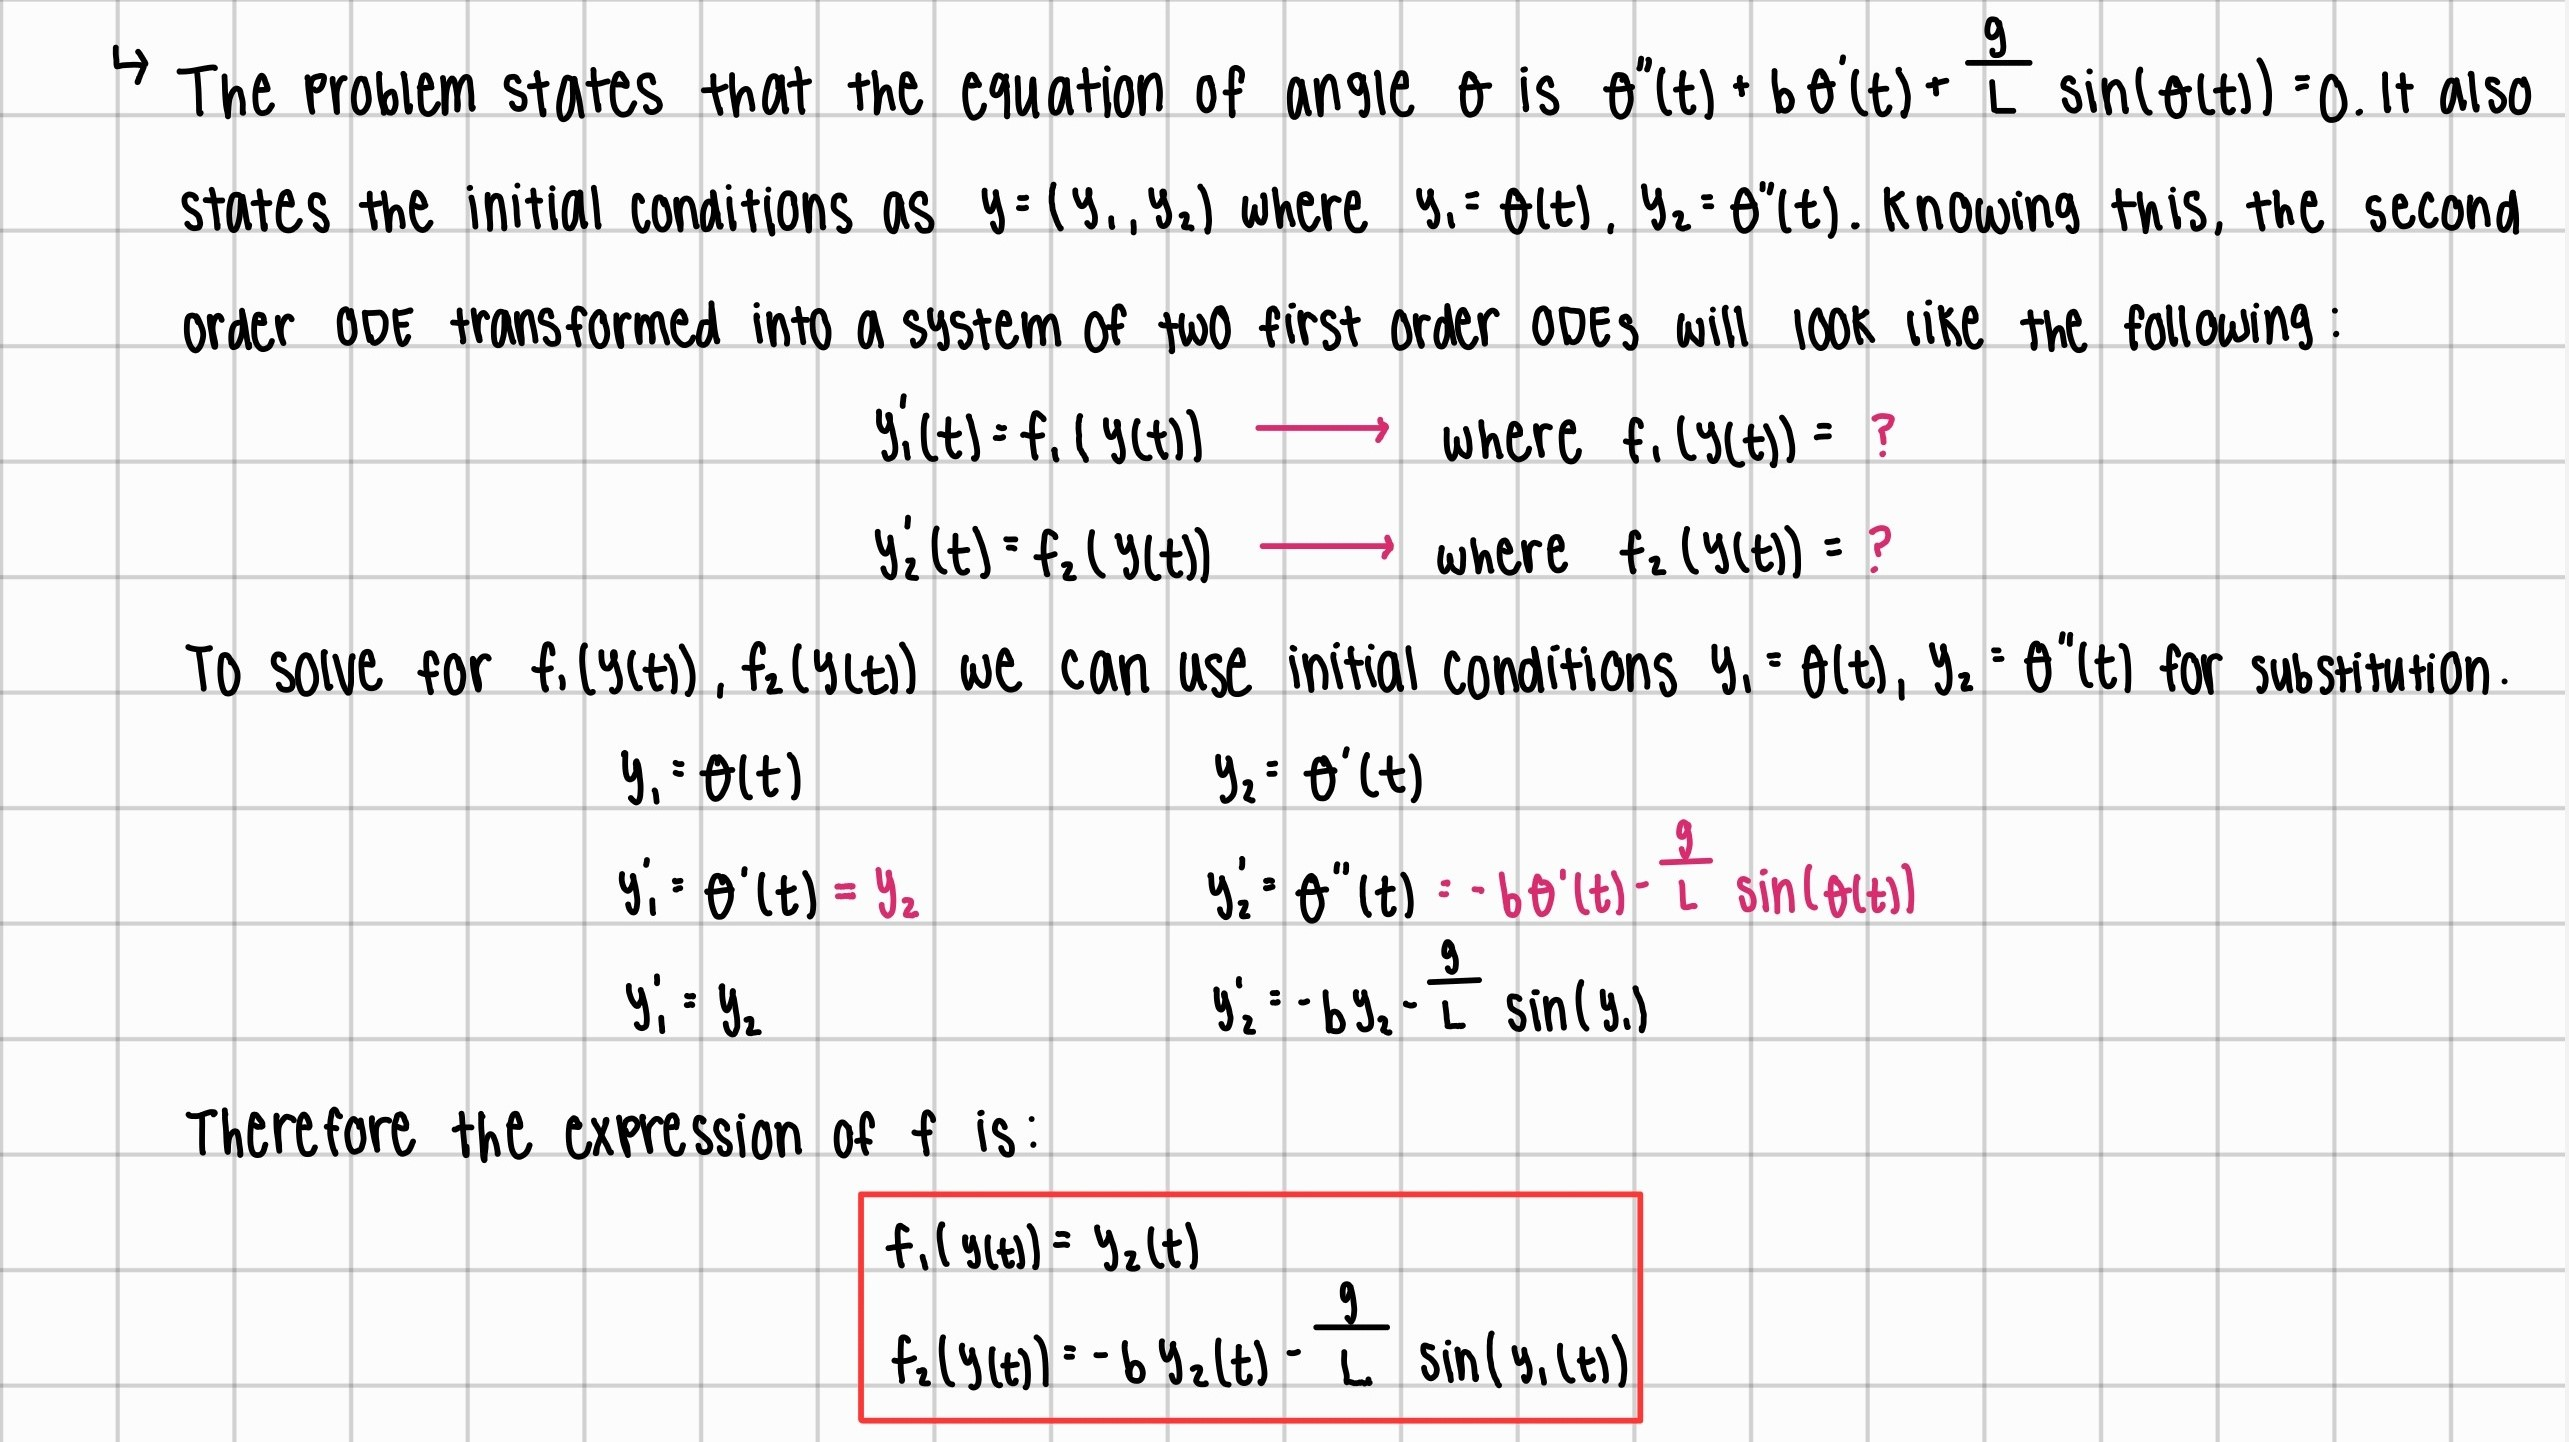

$\textbf{(2)}$ Write a Forward Euler solver to solve the ODE. Take the final time $T=25.6$, the time step value $τ=0.1$, the initial condition $y(0) = (0.1, 1)$ and assume $g=L$. 

Plot the angle solution as a function of time for three values of $b$ (plot the 3 curves on the same figure) 

$$
b = 0.1, 0.5, 1.0
$$

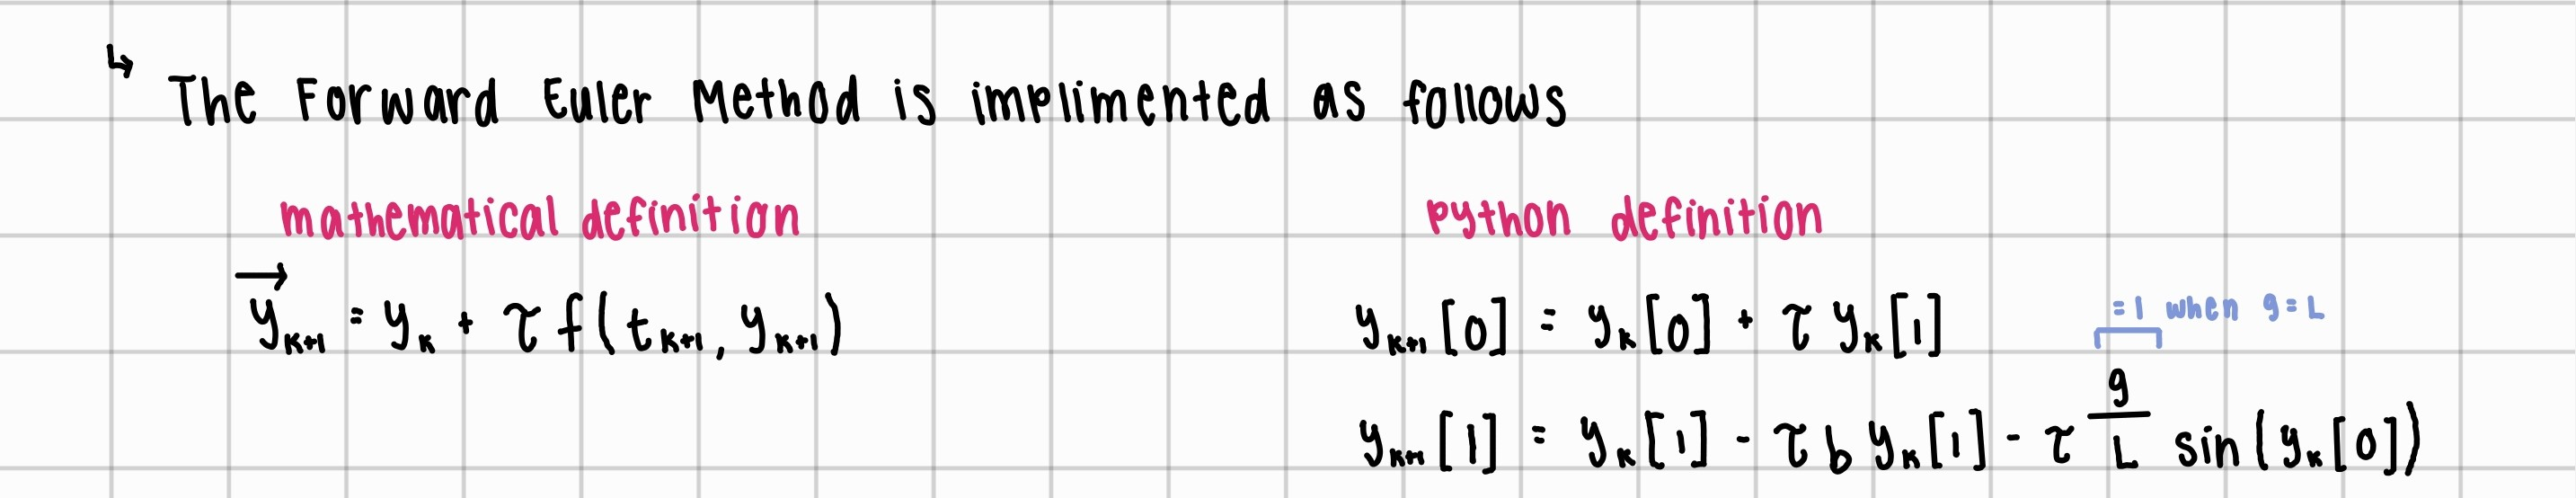

<function matplotlib.pyplot.show(close=None, block=None)>

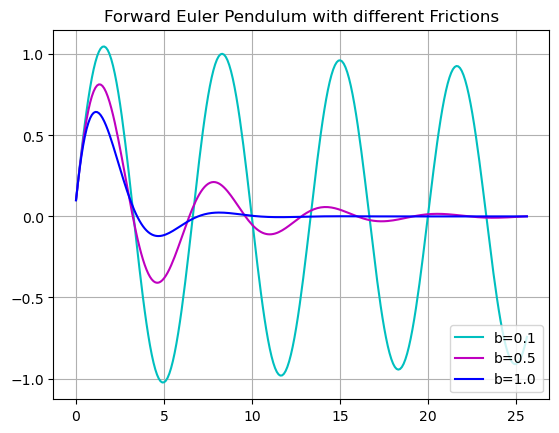

In [2]:
def ForwardEulerPendulum(tau,b,y0,T):  #g/L=1 so it's excluded
    t = np.arange(0,T+tau,tau)   #time interval (start,stop,step)
    y1 = np.zeros(len(t))        #theta
    y2 = np.zeros(len(t))        #derivative of theta
    y1[0] = y0[0]                #initial condition theta
    y2[0] = y0[1]                #initial condition derivative of theta
    
    for i in range(0,len(t)-1):  #(start,stop) for loop
        y1[i+1] = y1[i] + tau * y2[i]    #python definition of y1 Euler
        y2[i+1] = y2[i] - tau * b * y2[i] - tau * np.sin(y1[i])   #python definition of y2 Euler

    return y1  #return y1 value

y1_ForwardPendulum = ForwardEulerPendulum(0.1,0.1,[0.1,1],25.6)   #tau,b,y0,T
y2_ForwardPendulum = ForwardEulerPendulum(0.1,0.5,[0.1,1],25.6)   #tau,b,y0,T
y3_ForwardPendulum = ForwardEulerPendulum(0.1,1.0,[0.1,1],25.6)   #tau,b,y0,T
t = np.arange(0,25.7,0.1)    #0,T+tau (25.6+0.1),tau
plt.figure(1)    #keep plots in one figure
plt.plot(t,y1_ForwardPendulum,'c-',label='b=0.1')
plt.plot(t,y2_ForwardPendulum,'m-',label='b=0.5')
plt.plot(t,y3_ForwardPendulum,'b-',label='b=1.0')
plt.legend(loc='lower right')
plt.grid()
plt.title("Forward Euler Pendulum with different Frictions")
plt.show

$\textbf{(3)}$ Write a Backward Euler solver to solve the ODE. Use Newton’s method to solve the nonlinear system. The iterations are stopped if the difference 

$$
||y_{k+1} − y_{k}|| < 10^{−4}.
$$

In the homework write up include the derivation of Jacobian matrix. Take the final time $T=25.6$, the time step value $τ=0.1$, the initial condition $y(0) = (0.1, 1)$ and assume $g=L$. 

Plot the angle solution as a function of time for three values of $b$ (plot the 3 curves on the same figure)

$$
b = 0.1, 0.5, 1.0 
$$

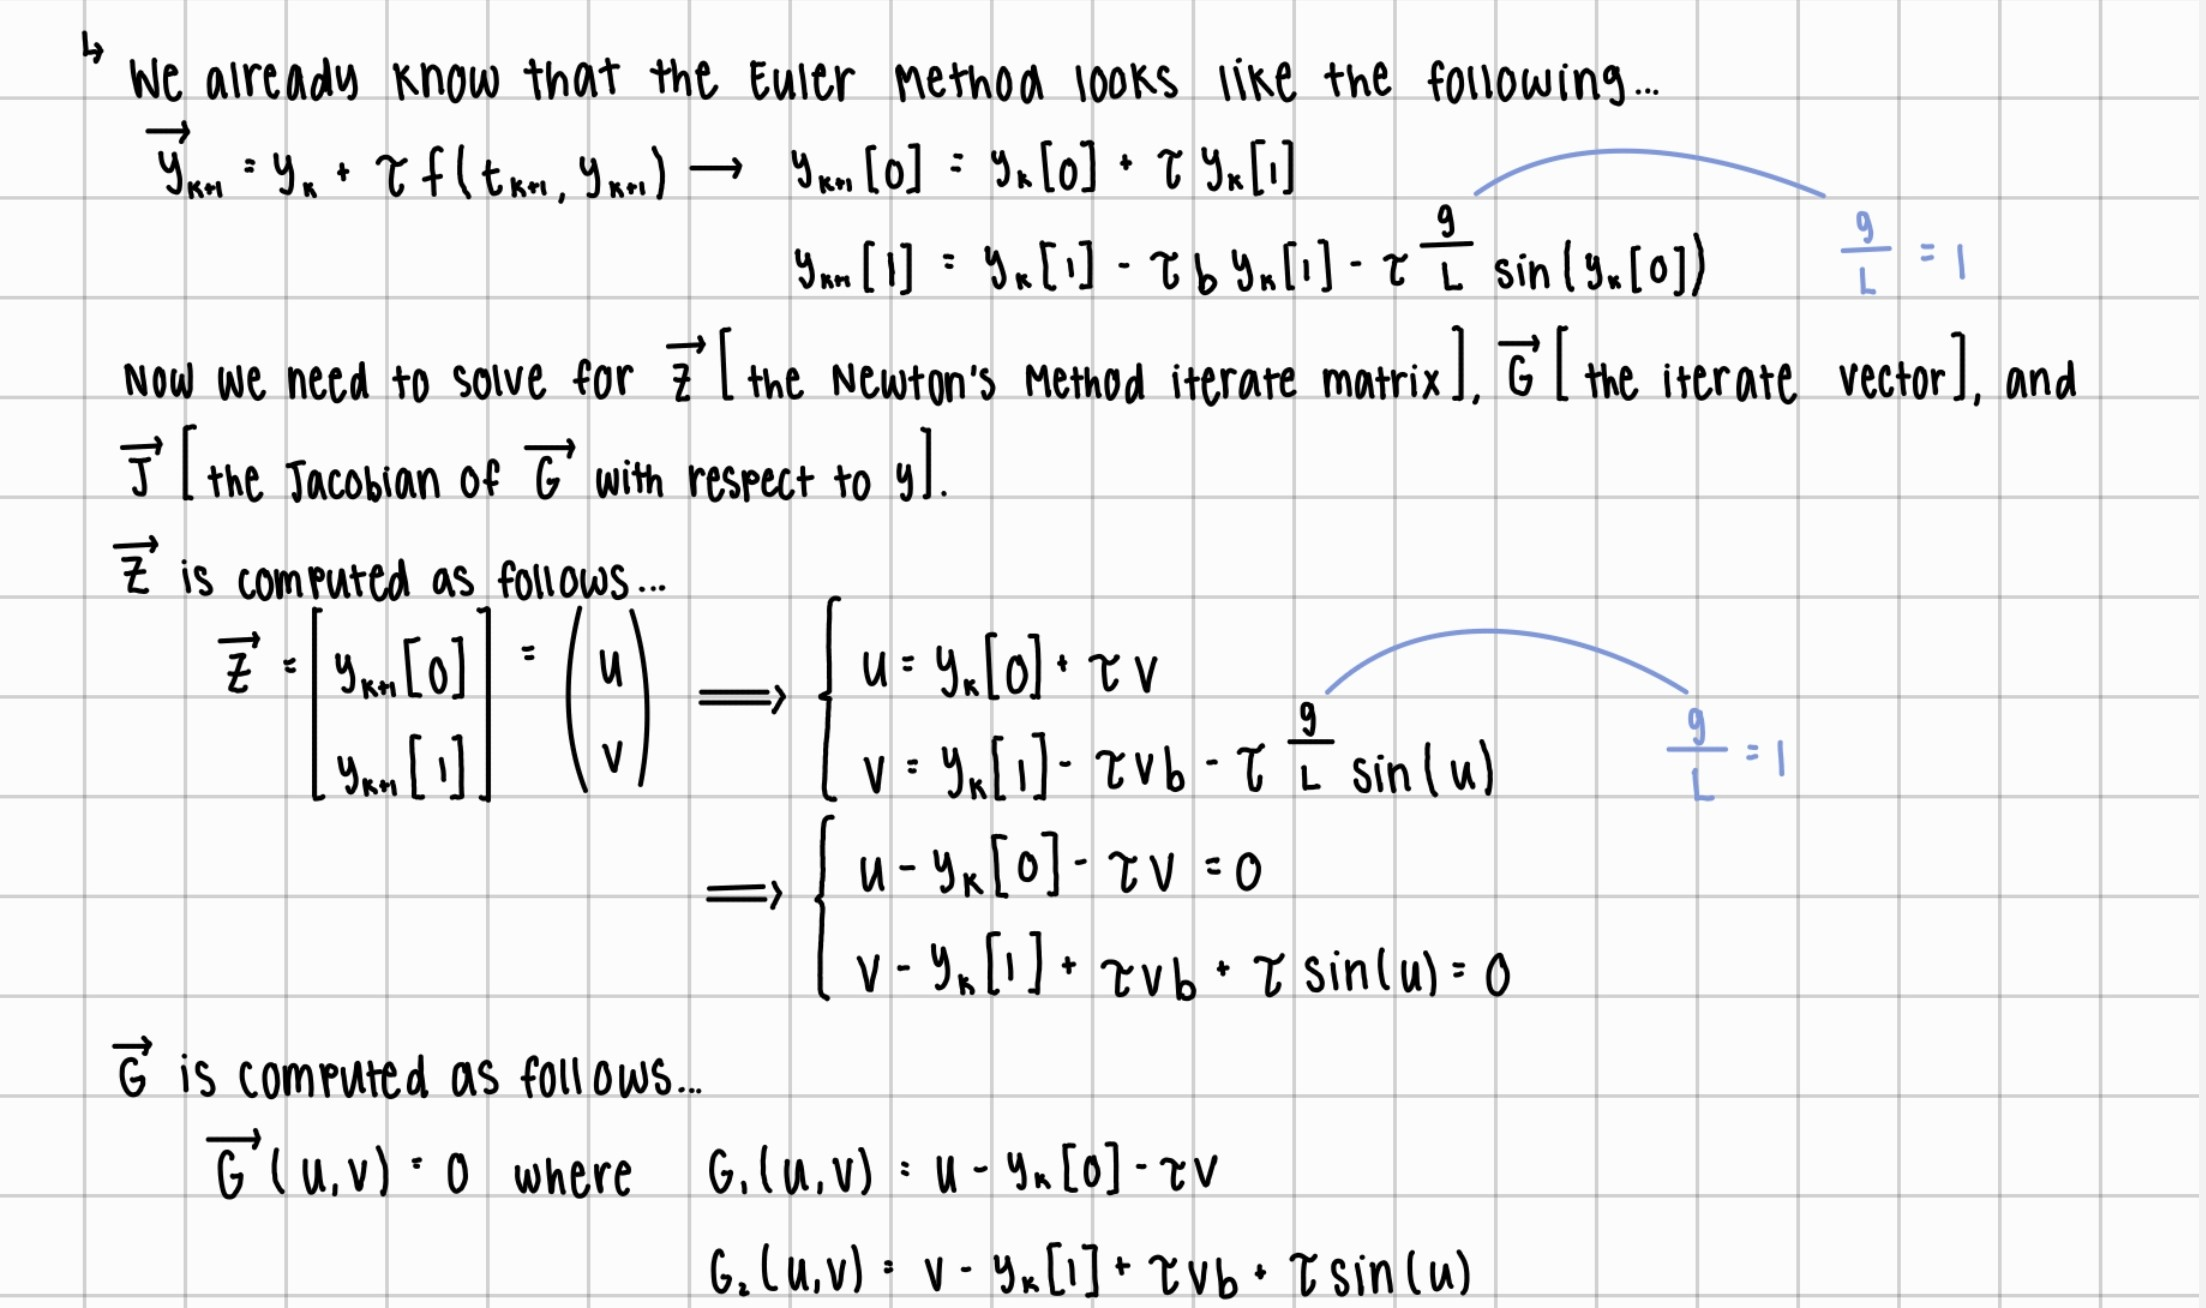

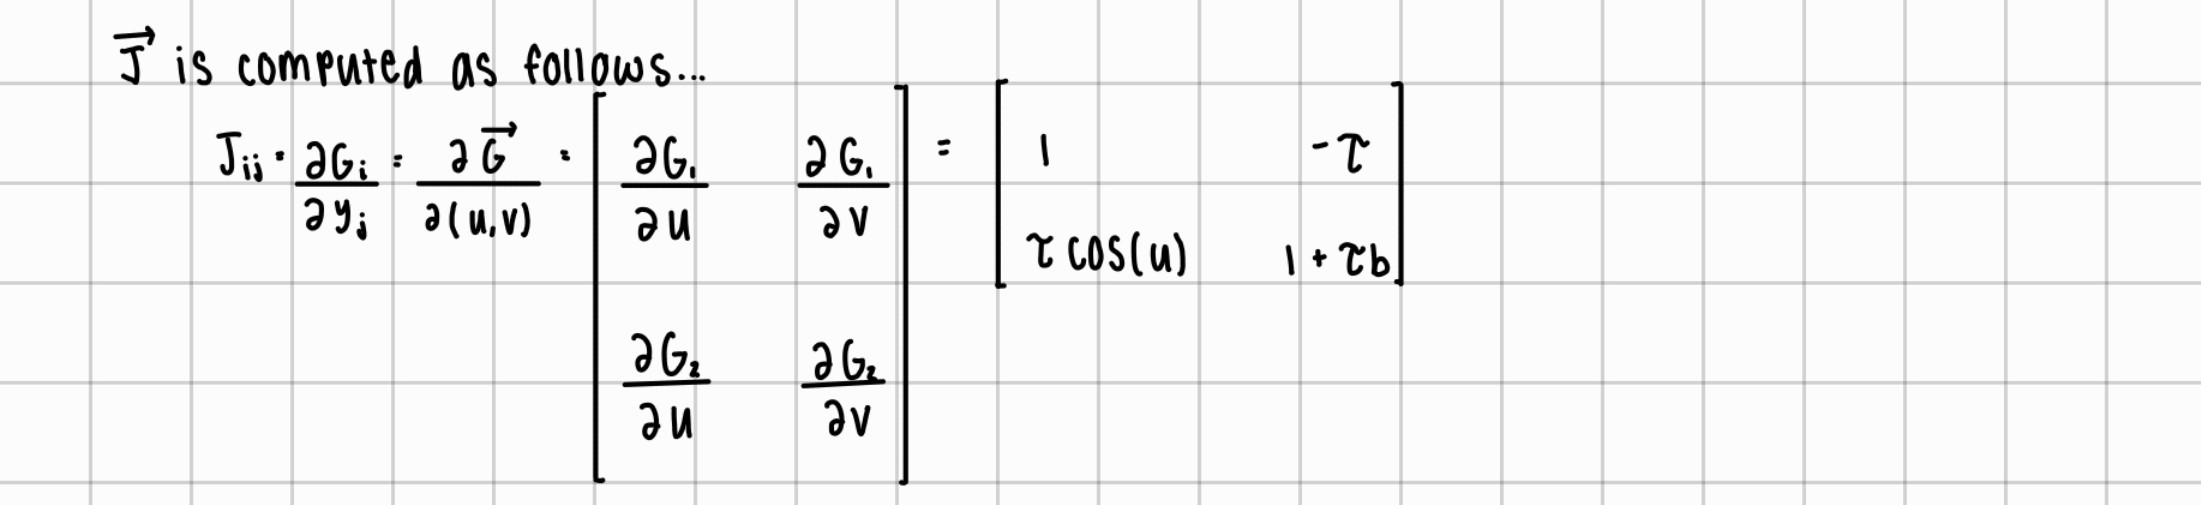

<function matplotlib.pyplot.show(close=None, block=None)>

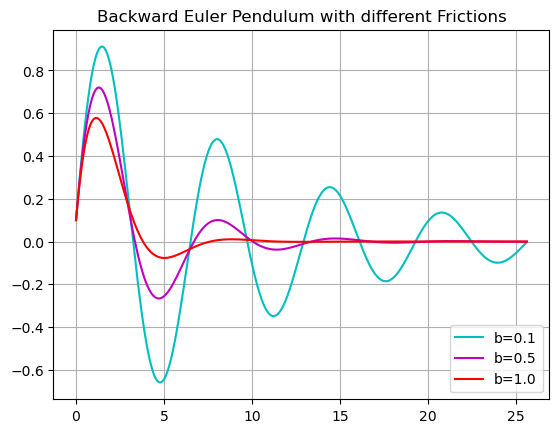

In [3]:
def BackwardEulerPendulum(tau,b,y0,T,maxiter):  #g/L=1 so it's excluded
    t = np.arange(0,T+tau,tau)   #time interval (start,stop,step)
    y1 = np.zeros(len(t))        #theta
    y2 = np.zeros(len(t))        #derivative of theta
    y1[0] = y0[0]                #initial condition theta
    y2[0] = y0[1]                #initial condition derivative of theta   
    
    for i in range(0,len(t)-1):  #(start,stop) for loop
        u = y1[i]  #initialize
        v = y2[i]  #initialize
        
        for j in range(0,maxiter): #(start, stop) maxiter=10 Newton iterations
            Gz = np.array([u-y1[i]-tau*v, v-y2[i]+tau*v*b+tau*np.sin(u)])  #iterate vector
            Jz = np.array(([1, -tau],[tau*np.cos(u), 1+tau*b]))            #Jacobian of Gz
            s = np.linalg.solve(Jz,Gz)  #solve linear matrix equation
            u = u - s[0]
            v = v - s[1]
            
        y1[i+1] = u
        y2[i+1] = v
    
    return y1  #return y1 value

y1_BackwardPendulum = BackwardEulerPendulum(0.1,0.1,[0.1,1],25.6,10)  #tau,b,y0,T,maxiter
y2_BackwardPendulum = BackwardEulerPendulum(0.1,0.5,[0.1,1],25.6,10)  #tau,b,y0,T,maxiter
y3_BackwardPendulum = BackwardEulerPendulum(0.1,1.0,[0.1,1],25.6,10)  #tau,b,y0,T,maxiter
t = np.arange(0,25.7,0.1)    #0,T+tau (25.6+0.1),tau
plt.figure(1)                #keep plots in one figure
plt.plot(t,y1_BackwardPendulum,'c-',label='b=0.1')
plt.plot(t,y2_BackwardPendulum,'m-',label='b=0.5')
plt.plot(t,y3_BackwardPendulum,'r-',label='b=1.0')
plt.legend(loc='lower right')
plt.grid()
plt.title("Backward Euler Pendulum with different Frictions")
plt.show        

Next, fix $b=0.5$. Plot on a new figure the Forward Euler solution and the Backward Euler solution for the same $τ = 0.1$.

<function matplotlib.pyplot.show(close=None, block=None)>

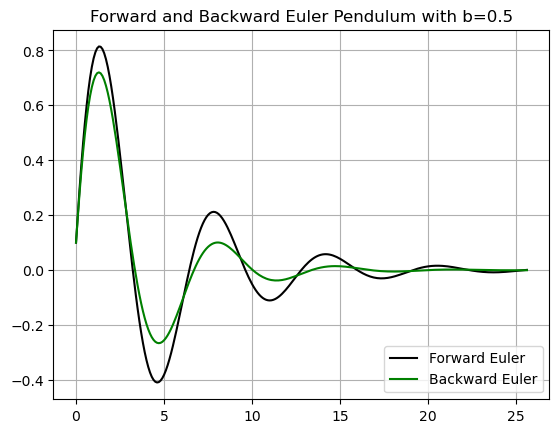

In [4]:
y1_ForwardPendulum = ForwardEulerPendulum(0.1,0.5,[0.1,1],25.6)   #tau,b,y0,T
y2_BackwardPendulum = BackwardEulerPendulum(0.1,0.5,[0.1,1],25.6,10)  #tau,b,y0,T,maxiter
t = np.arange(0,25.7,0.1)    #0,T+tau (25.6+0.1),tau
plt.figure(1)                #keep plots in one figure
plt.plot(t,y1_ForwardPendulum,'k-',label='Forward Euler')
plt.plot(t,y2_BackwardPendulum,'g-',label='Backward Euler')
plt.legend(loc='lower right')
plt.grid()
plt.title("Forward and Backward Euler Pendulum with b=0.5")
plt.show 

Next, still for $b=0.5$, plot on a new figure the Forward Euler solution obtained with $τ=0.01$ and the Backward Euler solution obtained for $τ=0.1$.

<function matplotlib.pyplot.show(close=None, block=None)>

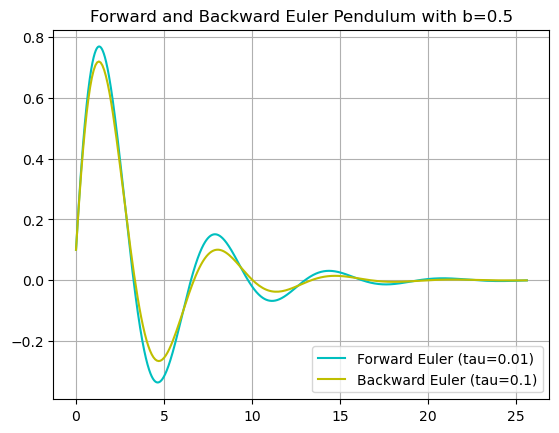

In [5]:
y1_ForwardPendulum = ForwardEulerPendulum(0.01,0.5,[0.1,1],25.6)      #tau,b,y0,T
y2_BackwardPendulum = BackwardEulerPendulum(0.1,0.5,[0.1,1],25.6,10)  #tau,b,y0,T,maxiter
t_ForwardPendulum = np.arange(0,25.60+0.01,0.01)     #0,T+tau (25.60+0.01),tau 
t_BackwardPendulum = np.arange(0,25.7,0.1)           #0,T+tau (25.6+0.1),tau
plt.figure(1)  #keep plots in one figure
plt.plot(t_ForwardPendulum,y1_ForwardPendulum,'c-',label='Forward Euler (tau=0.01)')
plt.plot(t_BackwardPendulum,y2_BackwardPendulum,'y-',label='Backward Euler (tau=0.1)')
plt.legend(loc='lower right')
plt.grid()
plt.title("Forward and Backward Euler Pendulum with b=0.5")
plt.show 